## Importando librerías a usar

In [14]:
from scipy.cluster import hierarchy

import random
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, MeanShift, AffinityPropagation

from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFromModel

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(2022)

# 1. Importar el Dataset

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means

In [5]:
# Leer el csv
DATOS = pd.read_csv('datasets/unsupervised/wine.csv')

# Mostrar los datos
DATOS

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [35]:
# Eliminar datos perdidos (indicados con una '?')
DATOS = DATOS[ ~ DATOS.isin(['?'])]

# Quitar filas con values NaN del DataFrame
DATOS = DATOS.dropna(axis = 0)

# Mostrar datos pre-procesados
DATOS

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


En este caso, observamos que no había ningún dato incorrecto/erróneo

In [36]:
# Mostrar la forma y los tipos de datos del DataFrame
print(DATOS.shape)
print(DATOS.dtypes)

(178, 14)
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object


In [38]:
# Trasformar los datos a numéricos para habilitar un análisis mas extenso
DATOS = DATOS.apply(pd.to_numeric)
DATOS.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [39]:
# Mostrar las características de los datos, usando la función describe() construida en pandas
DATOS.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


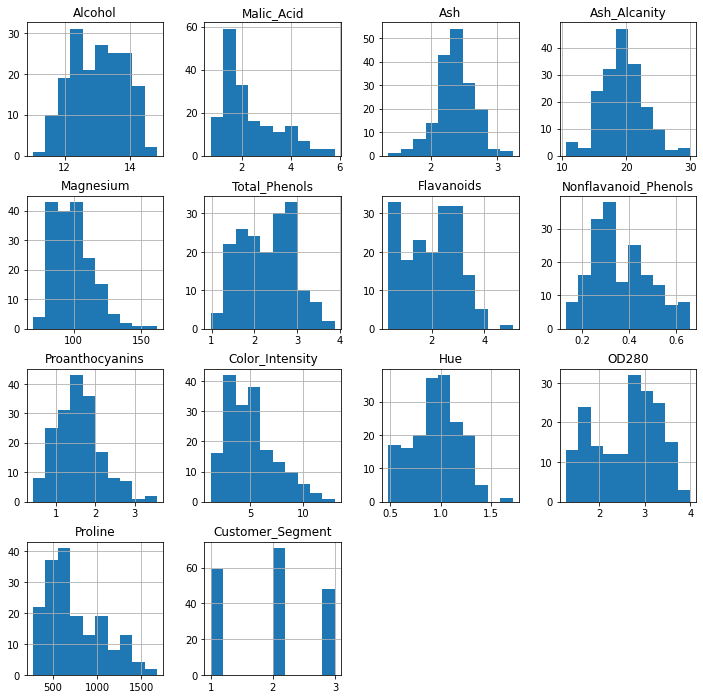

In [40]:
# Dibujar un histograma para cada variable
DATOS.hist(figsize = (12, 12))
plt.show()

In [ ]:
pd.crosstab(DATOS.age,DATOS.target).plot(kind = 'bar',figsize = (20,6))
plt.title('Heart Disease Frequency for Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

# 2. Selección de atributos

In [27]:
def muestra_relevancias(nombres, relevancias):
    '''Función para mostrar una gráfica con el grado de relevancia de cada atributo
    
    Recibe:
       - nombres: nombres de todos los atributos
       - relevancias: de cada atributo, calculadas mediante alguna técnica
    '''
    plt.figure(figsize=(len(nombres)/4,5))
    serie = pd.Series(relevancias, index=nombres)
    serie.plot(kind='bar')
    
def muestra_seleccion(nombres, mascara):
    '''Función para mostrar los nombres de los atributos seleccionados a partir de una máscara de booleanos
    
    Recibe:
       - nombres: nombres de todos los atributos
       - mascara: lista de booleanos que determina si un atributo se selecciona, o no
    '''    
    seleccionados = [n for n,m in zip(nombres, mascara) if m]
    print(len(seleccionados), seleccionados)

## 2.1 Test ANOVA

In [28]:
X = DATOS
y = pd.Series(DATOS.Alcohol)

In [29]:
# EJERCICIO: mostrar los atributos de X cuyos pvalues obtenidos por el test ANOVA sean menores o iguales que 0.05
for atrib, pvalor in zip(X.columns, pvalues):
    if pvalor < 0.05:
        print(atrib, ' -> ', pvalor)

Alcohol  ->  0.0
Magnesium  ->  0.001185301307019264
Color_Intensity  ->  0.00036966655563584516
Hue  ->  0.023504475241316637
Proline  ->  0.0008499486757643556


In [30]:
# EJERCICIO: mostrar los atributos de X cuyos pvalues obtenidos por el test ANOVA sean mayores que 0.05
for atrib, pvalor in zip(X.columns, pvalues):
    if pvalor > 0.05:
        print(atrib, ' -> ', pvalor)

Malic_Acid  ->  0.4922620433434565
Ash  ->  0.7307986071063002
Ash_Alcanity  ->  0.18147602542368924
Total_Phenols  ->  0.08991325234724416
Flavanoids  ->  0.13635666950466574
Nonflavanoid_Phenols  ->  0.7251023003460094
Proanthocyanins  ->  0.19356079049695238
OD280  ->  0.7383625832585392
Customer_Segment  ->  0.05976565538155993


[       inf 1.01214839 0.87347934 1.25115307 2.14497915 1.39006522
 1.30929783 0.87693491 1.23764488 2.3466157  1.63264996 0.86885757
 2.2022012  1.46609419]
[0.00000000e+00 4.92262043e-01 7.30798607e-01 1.81476025e-01
 1.18530131e-03 8.99132523e-02 1.36356670e-01 7.25102300e-01
 1.93560790e-01 3.69666556e-04 2.35044752e-02 7.38362583e-01
 8.49948676e-04 5.97656554e-02]


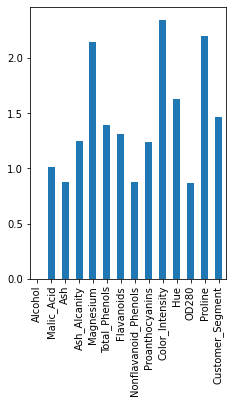

In [31]:
# EJERCICIO: mostrar el grado de relevancia de cada atributo del datastet X_RUIDOSOS mediante el test ANOVA
fvalues, pvalues = f_classif(X, y)
print(fvalues)
print(pvalues)

muestra_relevancias(X.columns, fvalues)

## 2.2 Selección de atributos

In [32]:
# EJERCICIO: mostrar la selección de la primera mitad de atributos (el 50% mejor) para X según el test ANOVA
selector = SelectPercentile(f_classif, percentile = 50)

# Para ajustar este selector a nuestro conjunto usamos el fit
selector.fit(X, y)

# Me dice que parámetros van a ser escogidos: get_support
print(selector.get_support())

# Obtengo el nombre de los parámetros escogidos
muestra_seleccion(X.columns, selector.get_support())

# Obtener número de datos seleccionados
X_sel = selector.fit_transform(X, y)
print(X_sel.shape)

[ True False False False  True  True False False False  True  True False
  True  True]
7 ['Alcohol', 'Magnesium', 'Total_Phenols', 'Color_Intensity', 'Hue', 'Proline', 'Customer_Segment']
(178, 7)


Observamos que los atributos más relevantes respecto a la clase "Alcohol" son:

- Alcohol (por defecto)
- Magnesium
- Total_Phenols
- Color_Intensity
- Hue
- Proline
- Customer_Segment

# 3. Discretización del atributo "Alcohol"

In [134]:
DATOS['Alcohol'] = DATOS['Alcohol'].round(0).astype(int)
DATOS['Alcohol'] = DATOS.Alcohol.astype(str)
DATOS['Alcohol'] = DATOS.Alcohol.astype('category')
print (DATOS)
print(DATOS['Alcohol'])

    Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0        14        1.71  2.43          15.6        127           2.80   
1        13        1.78  2.14          11.2        100           2.65   
2        13        2.36  2.67          18.6        101           2.80   
3        14        1.95  2.50          16.8        113           3.85   
4        13        2.59  2.87          21.0        118           2.80   
..      ...         ...   ...           ...        ...            ...   
173      14        5.65  2.45          20.5         95           1.68   
174      13        3.91  2.48          23.0        102           1.80   
175      13        4.28  2.26          20.0        120           1.59   
176      13        2.59  2.37          20.0        120           1.65   
177      14        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28     

## 3.1 Obtención de la clase

In [135]:
y = pd.Series(DATOS['Alcohol'])
y

0      14
1      13
2      13
3      14
4      13
       ..
173    14
174    13
175    13
176    13
177    14
Name: Alcohol, Length: 178, dtype: category
Categories (5, object): ['11', '12', '13', '14', '15']

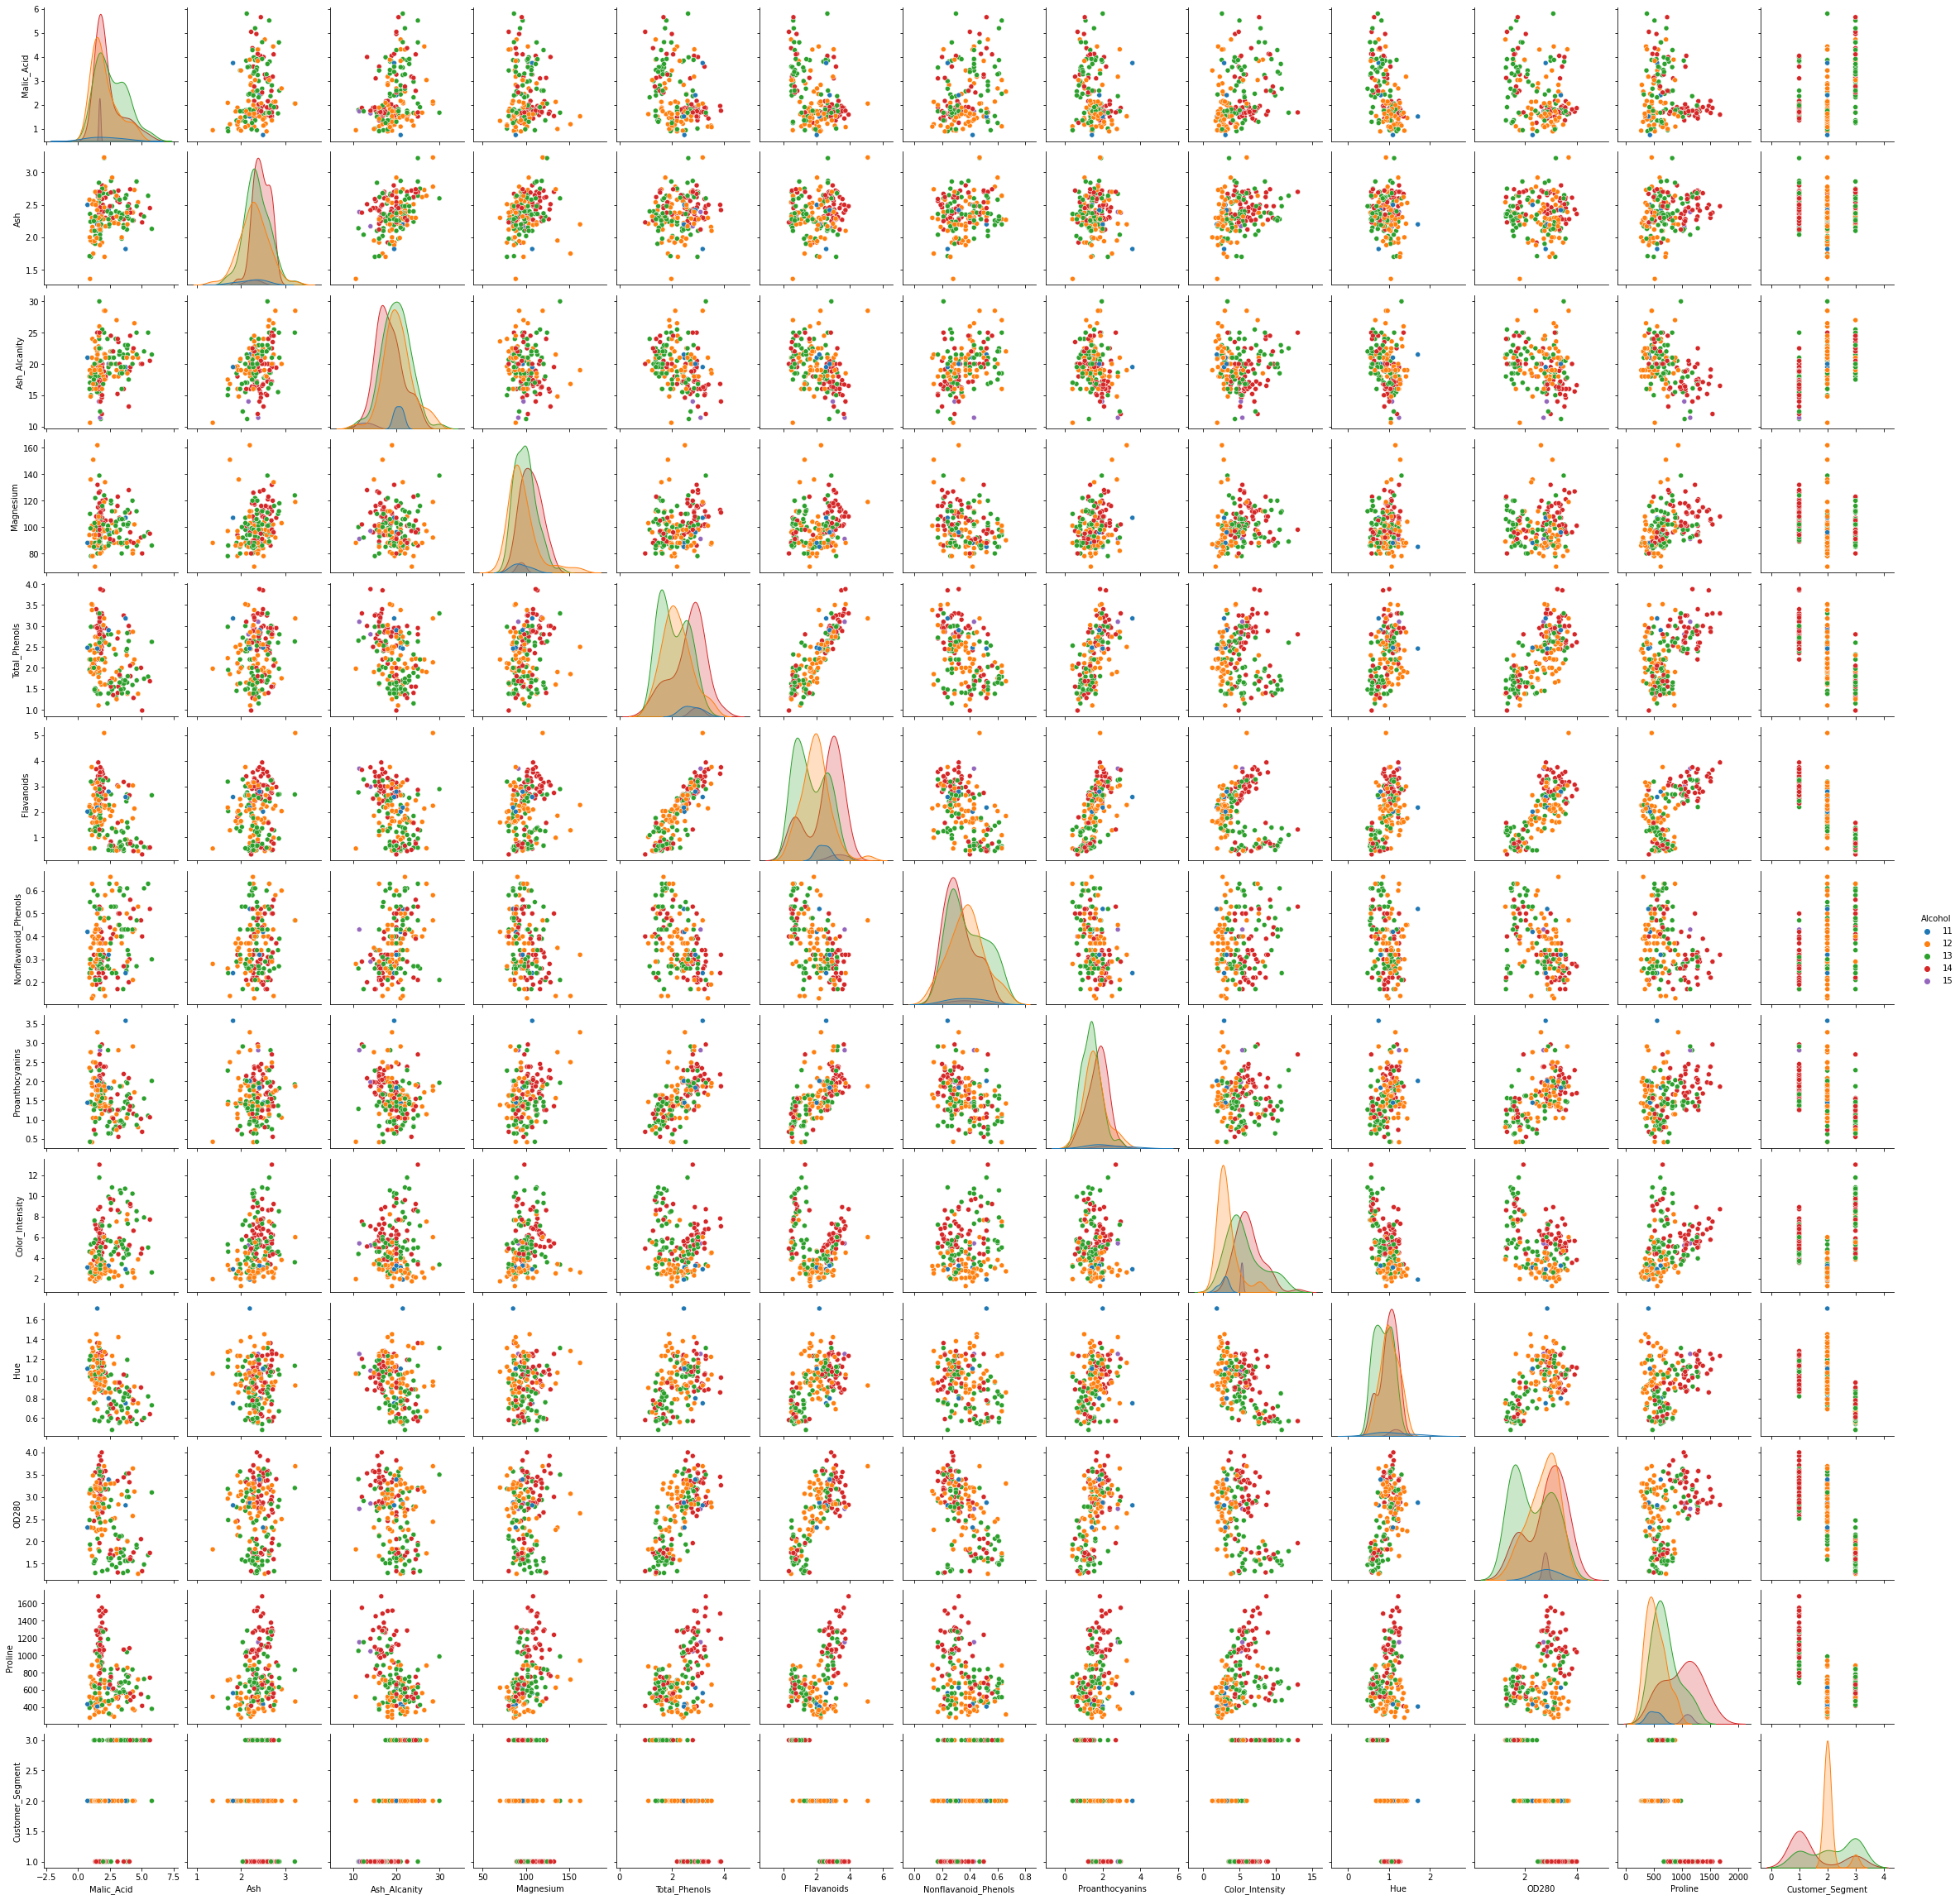

In [136]:
# Representación en 2D de alcohol frente al resto
data = DATOS
sns.pairplot(data, hue = 'Alcohol')

In [137]:
def muestra_agrupacion(puntos, clusters):
    puntos_2D = pd.DataFrame(PCA(n_components = 2).fit_transform(puntos), columns = ['x', 'y'])
    puntos_2D['grupo'] = clusters
    numero_grupos = len(pd.Series(clusters).unique())
    
    plt.figure(figsize = (5,5))
    paleta = sns.color_palette("bright", numero_grupos)
    sns.scatterplot(x = 'x', y = 'y', hue = 'grupo', data = puntos_2D, palette = paleta)
    plt.xticks([], [])
    plt.xlabel('')
    plt.yticks([], [])
    plt.ylabel('')
    plt.show()

# 4. K-means

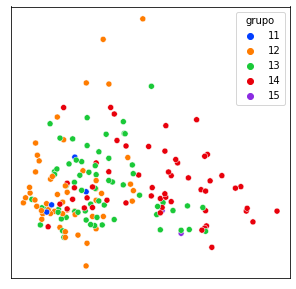

In [138]:
muestra_agrupacion(DATOS, y)

### Para 2 clústers

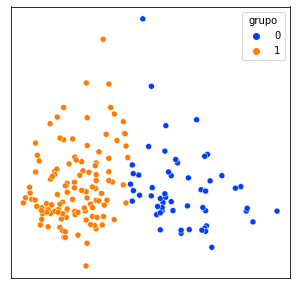

In [143]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(DATOS)
muestra_agrupacion(DATOS, kmeans.labels_)

### Para 3 clústers

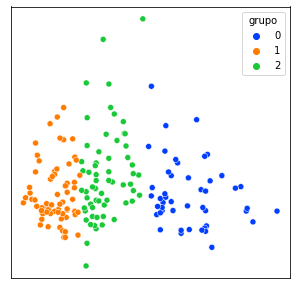

In [144]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(DATOS)
muestra_agrupacion(DATOS, kmeans.labels_)

### Para 4 clústers

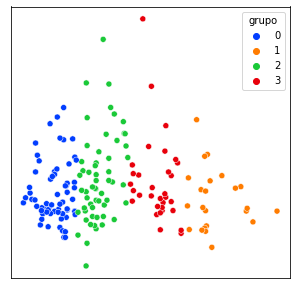

In [145]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(DATOS)
muestra_agrupacion(DATOS, kmeans.labels_)

In [146]:
# mostramos los centroides de una agrupación k-means para cuatro grupos

# cluster_centers_
print(kmeans.cluster_centers_)

[[1.25151515e+01 2.44318182e+00 2.28378788e+00 2.07772727e+01
  9.24696970e+01 2.07333333e+00 1.79545455e+00 3.84696970e-01
  1.47181818e+00 4.07242423e+00 9.46212121e-01 2.50484848e+00
  4.52545455e+02 2.25757576e+00]
 [1.38260870e+01 1.79391304e+00 2.50695652e+00 1.70739130e+01
  1.06000000e+02 2.94304348e+00 3.11086957e+00 2.98695652e-01
  1.92608696e+00 6.26000000e+00 1.10000000e+00 3.03565217e+00
  1.33856522e+03 1.00000000e+00]
 [1.29122807e+01 2.66192982e+00 2.40315789e+00 1.99807018e+01
  1.01842105e+02 2.04912281e+00 1.46315789e+00 4.01929825e-01
  1.43350877e+00 5.75333333e+00 8.65087719e-01 2.29631579e+00
  6.97087719e+02 2.36842105e+00]
 [1.35000000e+01 1.92593750e+00 2.37093750e+00 1.77250000e+01
  1.06500000e+02 2.72500000e+00 2.74250000e+00 2.88750000e-01
  1.87593750e+00 4.98875000e+00 1.04268750e+00 3.08906250e+00
  1.01743750e+03 1.18750000e+00]]


In [147]:
#  mostramos la inercia de distintas agrupaciones de k-means de 2 a 10 grupos

# inertia_
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_IRIS)
    print(i, kmeans.inertia_)

2 152.34795176035792
3 78.85144142614601
4 57.228473214285714
5 46.44618205128205
6 39.03998724608725
7 34.299712121212124
8 30.064593073593073
9 27.86142885623149
10 26.04626629072682
